<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n250.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.286423,42.614035,79.316648,-0.016800,173.200305,173.216592,-0.016287
1,0.0,1.0,91.648109,28.373156,82.812707,0.007819,212.841791,212.834025,0.007766
2,0.0,2.0,93.104187,99.366715,26.504452,-0.002613,228.972741,228.976848,-0.004107
3,0.0,3.0,99.084799,69.130559,76.191504,-0.004084,254.402778,254.407363,-0.004585
4,0.0,4.0,23.812794,91.011586,28.670841,0.002867,153.498088,153.495657,0.002431
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.149234,78.344687,40.918650,0.006784,163.419356,163.413025,0.006332
249996,999.0,246.0,76.846310,91.504788,43.974371,-0.004335,222.321135,222.328069,-0.006934
249997,999.0,247.0,28.432775,78.071553,55.665628,0.004902,172.174858,172.169765,0.005092
249998,999.0,248.0,28.727841,74.580190,50.751198,-0.001349,164.057880,164.058991,-0.001110


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.286423,42.614035,79.316648,-0.016800,173.200305,173.216592,-0.016287
1,0.0,1.0,91.648109,28.373156,82.812707,0.007819,212.841791,212.834025,0.007766
2,0.0,2.0,93.104187,99.366715,26.504452,-0.002613,228.972741,228.976848,-0.004107
3,0.0,3.0,99.084799,69.130559,76.191504,-0.004084,254.402778,254.407363,-0.004585
4,0.0,4.0,23.812794,91.011586,28.670841,0.002867,153.498088,153.495657,0.002431
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.149234,78.344687,40.918650,0.006784,163.419356,163.413025,0.006332
249996,999.0,246.0,76.846310,91.504788,43.974371,-0.004335,222.321135,222.328069,-0.006934
249997,999.0,247.0,28.432775,78.071553,55.665628,0.004902,172.174858,172.169765,0.005092
249998,999.0,248.0,28.727841,74.580190,50.751198,-0.001349,164.057880,164.058991,-0.001110


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.286423  42.614035  79.316648 -0.016800  173.200305   
      1.0    91.648109  28.373156  82.812707  0.007819  212.841791   
      2.0    93.104187  99.366715  26.504452 -0.002613  228.972741   
      3.0    99.084799  69.130559  76.191504 -0.004084  254.402778   
      4.0    23.812794  91.011586  28.670841  0.002867  153.498088   
...                ...        ...        ...       ...         ...   
999.0 245.0  34.149234  78.344687  40.918650  0.006784  163.419356   
      246.0  76.846310  91.504788  43.974371 -0.004335  222.321135   
      247.0  28.432775  78.071553  55.665628  0.004902  172.174858   
      248.0  28.727841  74.580190  50.751198 -0.001349  164.057880   
      249.0  56.680588  76.359389  99.257826  0.004213  242.302016   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.216592 -0.016287  
      1.0    212.834025  0.007766  
      2.0    228.976848 -0.004107  
      3.0    254.407363 -0.004585  
      4.0    153.495657  0.002431  
...                 ...       ...  
999.0 245.0  163.413025  0.006332  
      246.0  222.328069 -0.006934  
      247.0  172.169765  0.005092  
      248.0  164.058991 -0.001110  
      249.0  242.297218  0.004798  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.286423  42.614035  79.316648 -0.016800  173.200305   
      1.0    91.648109  28.373156  82.812707  0.007819  212.841791   
      2.0    93.104187  99.366715  26.504452 -0.002613  228.972741   
      3.0    99.084799  69.130559  76.191504 -0.004084  254.402778   
      4.0    23.812794  91.011586  28.670841  0.002867  153.498088   
...                ...        ...        ...       ...         ...   
999.0 245.0  34.149234  78.344687  40.918650  0.006784  163.419356   
      246.0  76.846310  91.504788  43.974371 -0.004335  222.321135   
      247.0  28.432775  78.071553  55.665628  0.004902  172.174858   
      248.0  28.727841  74.580190  50.751198 -0.001349  164.057880   
      249.0  56.680588  76.359389  99.257826  0.004213  242.302016   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.216592 -0.016287  
      1.0    212.834025  0.007766  
      2.0    228.976848 -0.004107  
      3.0    254.407363 -0.004585  
      4.0    153.495657  0.002431  
...                 ...       ...  
999.0 245.0  163.413025  0.006332  
      246.0  222.328069 -0.006934  
      247.0  172.169765  0.005092  
      248.0  164.058991 -0.001110  
      249.0  242.297218  0.004798  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.286423,42.614035,79.316648,-0.016800,173.200305,173.216592,-0.016287
1,0.0,1.0,91.648109,28.373156,82.812707,0.007819,212.841791,212.834025,0.007766
2,0.0,2.0,93.104187,99.366715,26.504452,-0.002613,228.972741,228.976848,-0.004107
3,0.0,3.0,99.084799,69.130559,76.191504,-0.004084,254.402778,254.407363,-0.004585
4,0.0,4.0,23.812794,91.011586,28.670841,0.002867,153.498088,153.495657,0.002431
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.149234,78.344687,40.918650,0.006784,163.419356,163.413025,0.006332
249996,999.0,246.0,76.846310,91.504788,43.974371,-0.004335,222.321135,222.328069,-0.006934
249997,999.0,247.0,28.432775,78.071553,55.665628,0.004902,172.174858,172.169765,0.005092
249998,999.0,248.0,28.727841,74.580190,50.751198,-0.001349,164.057880,164.058991,-0.001110


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.286423  42.614035  79.316648 -0.016800  173.200305   
      1.0    91.648109  28.373156  82.812707  0.007819  212.841791   
      2.0    93.104187  99.366715  26.504452 -0.002613  228.972741   
      3.0    99.084799  69.130559  76.191504 -0.004084  254.402778   
      4.0    23.812794  91.011586  28.670841  0.002867  153.498088   
...                ...        ...        ...       ...         ...   
999.0 245.0  34.149234  78.344687  40.918650  0.006784  163.419356   
      246.0  76.846310  91.504788  43.974371 -0.004335  222.321135   
      247.0  28.432775  78.071553  55.665628  0.004902  172.174858   
      248.0  28.727841  74.580190  50.751198 -0.001349  164.057880   
      249.0  56.680588  76.359389  99.257826  0.004213  242.302016   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.216592 -0.016287  
      1.0    212.834025  0.007766  
      2.0    228.976848 -0.004107  
      3.0    254.407363 -0.004585  
      4.0    153.495657  0.002431  
...                 ...       ...  
999.0 245.0  163.413025  0.006332  
      246.0  222.328069 -0.006934  
      247.0  172.169765  0.005092  
      248.0  164.058991 -0.001110  
      249.0  242.297218  0.004798  

[250000 rows x 7 columns]

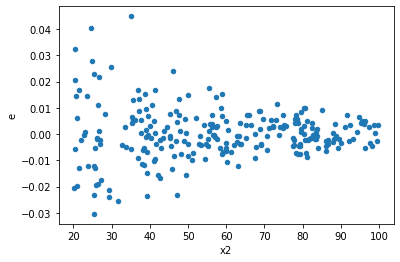

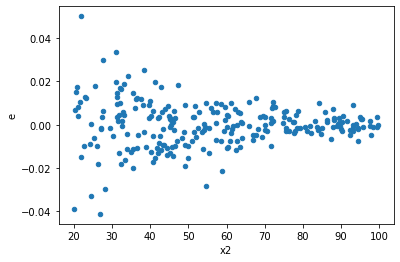

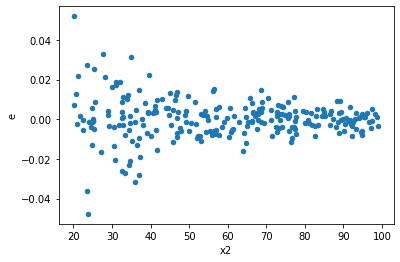

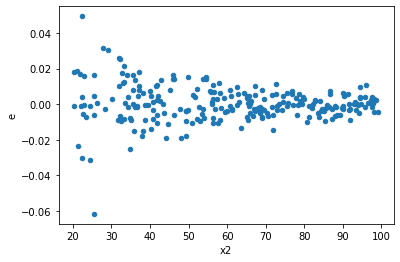

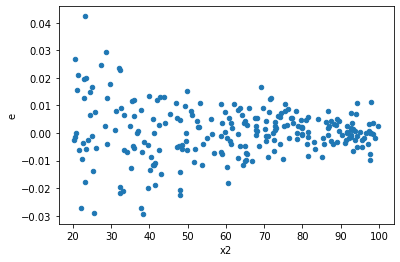

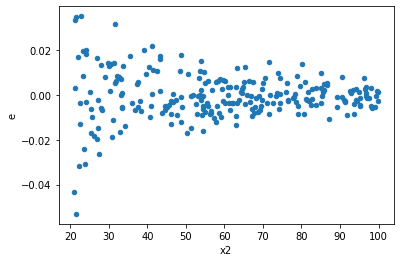

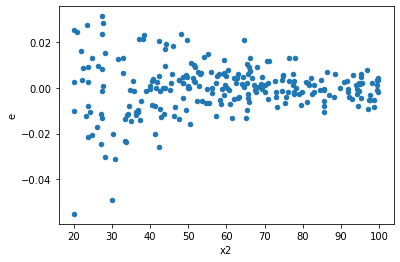

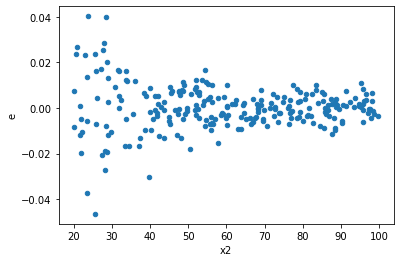

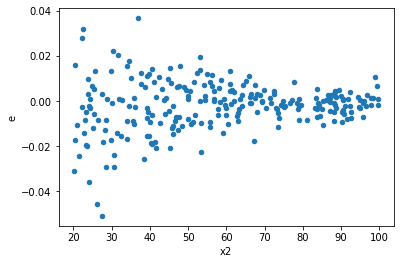

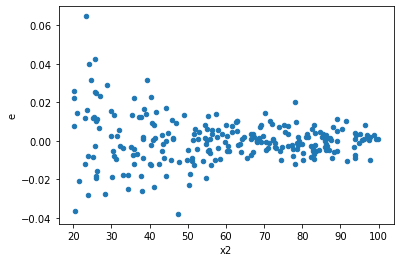

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.013888094745322873,0.004757035619539942,0.00014317623448786466,4.904160432515404e-05,0.34252614968240913,2.682709732017751e-07,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,0.010404252232620008,0.003971833386707464,0.00010726033229505162,4.0946735945437774e-05,0.3817509704594382,3.429246494642143e-06,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,0.013151921932571316,0.0046581359736210986,0.00013558682404712696,4.802202034660927e-05,0.3541791076241883,6.023095416514307e-07,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,0.019328625537794106,0.003673909864793094,0.0001992641808020011,3.787535943085664e-05,0.19007610539142256,9.263261927963976e-15,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,0.013071701167146638,0.004784070737694859,0.00013475980584687255,4.932031688345215e-05,0.36598685025930344,1.3053066603120967e-06,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,0.019285335956529516,0.004192538665132119,0.00019881789645906717,4.3222048094145556e-05,0.21739515840337922,7.294002975908293e-13,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,0.01670346185186204,0.005405140904593989,0.00017220063764806227,5.572310210921638e-05,0.32359405209115044,6.487204750513392e-08,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,0.0162296151258587,0.004129763523552793,0.00016731561985421341,4.257488168611127e-05,0.25445850018789584,8.867312011992801e-11,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,0.01632463087110205,0.005938232833200993,0.00016829516361960877,6.121889518763911e-05,0.3637590877299949,1.1319161858240445e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    970
Reject001=1 : Homoscedasticity       30
Name: Result_test, dtype: int64